## Introduction & Data quality:

The project is titled "Exploratory Analysis on the Causes of Death in the Past Decade." Its objective is to investigate the major and minor causes of death among German men and women during the last ten years, and observe what has changed througout the period. The dataset required for this analysis was obtained from the website of The Federal Statistical Office (www.genesis.destatis.de).

The dataset includes data from the years 2011 to 2020, allowing us to capture trends over the past decade and analyze the progression or decline of various causes of death from the beginning to the end of this period. Initially, the dataset contained nearly 80 unique causes of death. However, for the sake of simplicity and to convey the overall message effectively, these causes were consolidated into 37 categories. For example, different types of neoplasms were grouped as either benign or malignant neoplasms, and conditions like Hypertensive disease, myocardial infarctions, and diseases of the endocardium were grouped under Diseases of the circulatory system.

Deaths attributed to COVID-19 were excluded from the analysis. This decision was made because the pandemic was an exceptional situation that required individual analysis, and comparing it to various other causes throughout the decade would not provide meaningful insights.

In a few instances, null values were observed in the dataset, represented by "-". To facilitate the analysis, these placeholders were replaced with zeros.

# 1. Getting and cleaning the data

In [1]:
#Getting the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#created another file to do the basic datapreprocessing.
from data_processing import load_dataframe, clean_dataframe

In [4]:

#Constants 
#Population figures obbtained from Table 12411 at Genesis.destatis.de
POPULATION_2011 = 80327900
POPULATION_2020 = 83155031
DEATHS_2011 = 944675
DEATHS_2020 = 1068660
FILE_PATH = 'D:/RSE1/data/Death_DE.csv'

#Load and clean dataframe
df = load_dataframe(FILE_PATH, delimiter=';')
df = clean_dataframe(df)
# Grouping the causes of death for the last decade
df_causes = df.drop(df.columns[0], axis=1)
grouped_causes = df_causes.groupby('Cause of Death').sum().reset_index()

#Getting annual yearly death counts
df_years = df.drop(df.columns[1], axis=1)
yearly_deaths = df_years.groupby('Year').sum().reset_index()

# 2. Writing funtions for analysis.

In [5]:
def calculate_death_statistics(yearly_deaths: pd.DataFrame, grouped_causes: pd.DataFrame) -> None:
    """
    Calculate and print death statistics based on the yearly_deaths and grouped_causes DataFrames.

    Args:
        yearly_deaths (pd.DataFrame): DataFrame containing yearly deaths data.
        grouped_causes (pd.DataFrame): DataFrame containing grouped causes data.
    """
    total_deaths = yearly_deaths['Total'].sum()
    total_deaths_male = yearly_deaths['Male'].sum()
    total_deaths_female = yearly_deaths['Female'].sum()
    disease_count = grouped_causes['Cause of Death'].nunique()

    print(f"The total number of unique causes of death in the past decade is: {disease_count}")
    print(f"The total number of people who died in the past decade is: {total_deaths}")
    print(f"The total number of men who died in the past decade is: {total_deaths_male}")
    print(f"The total number of women who died in the past decade is: {total_deaths_female}")






def plot_death_charts(yearly_deaths):
    """
    Plot line and pie charts to visualize death statistics.

    Args:
        yearly_deaths (pandas.DataFrame): DataFrame containing yearly deaths data.
    """
    # Getting total male and female deaths
    total_deaths_male = yearly_deaths['Male'].sum()
    total_deaths_female = yearly_deaths['Female'].sum()

    # Create a list of labels for the pie chart
    labels = ['Male', 'Female']

    # Create a list of values for the pie chart
    values = [total_deaths_male, total_deaths_female]

    # Create a list of colors for the pie chart
    colors = ['blue', 'pink']

    # Create the line chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Adjust figsize as needed

    ax1.plot(yearly_deaths['Year'], yearly_deaths['Male'], color='blue', linestyle='-', marker='o', label='Male')
    ax1.plot(yearly_deaths['Year'], yearly_deaths['Female'], color='pink', linestyle='--', marker='s', label='Female')
    ax1.plot(yearly_deaths['Year'], yearly_deaths['Total'], color='black', linestyle='-', marker='^', label='Total')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Deaths')
    ax1.set_title('Annual Number of Deaths')
    ax1.legend()

    # Create the pie chart
    ax2.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Male vs Female Deaths')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the subplots
    plt.show()






def plot_causes(grouped_causes, plot_type='top', num_causes=10):
    """
    Plot bar charts for the top or lowest causes of death.

    Args:
        grouped_causes (pandas.DataFrame): DataFrame containing grouped causes of death.
        plot_type (str, optional): Type of plot to create, 'top' (default) or 'lowest'.
        num_causes (int, optional): Number of causes to include in the plot. Defaults to 10.

    Returns:
        None
    """
    if plot_type == 'top':
        top_causes = grouped_causes.nlargest(num_causes, 'Total')
        title_prefix = 'Top'
        colors = ['black', 'blue', 'pink']
    elif plot_type == 'lowest':
        top_causes = grouped_causes.nsmallest(num_causes, 'Total')
        title_prefix = 'Lowest'
        colors = ['black', 'blue', 'pink']
    else:
        raise ValueError("Invalid plot type. Supported values are 'top' or 'lowest'.")

    # Create the subplots
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    for i, (ax, column, color) in enumerate(zip(axes, ['Total', 'Male', 'Female'], colors)):
        ax.bar(top_causes['Cause of Death'], top_causes[column], color=color)
        ax.set_xlabel('Cause of Death')
        ax.set_ylabel(f'{column} Deaths')
        ax.set_title(f'{num_causes} {title_prefix} Causes of Death ({column})')
        ax.set_xticks(range(num_causes))
        ax.set_xticklabels(top_causes['Cause of Death'], rotation='vertical')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the subplots
    plt.show()



def plot_male_female_deaths_proportion(df):
    """
    Plot pie charts to visualize the proportion of male and female deaths for two specific years (2011 and 2020).

    Args:
        df (DataFrame): DataFrame containing the data.

    """
    # Step 1: Filter the data for the years 2011 and 2020
    filtered_data = df[df['Year'].isin([2011, 2020])]

    # Step 2: Calculate the total number of male and female deaths for each year
    grouped_data = filtered_data.groupby('Year')[['Male', 'Female']].sum().reset_index()

    # Create the subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Pie chart for male and female deaths in 2011
    axs[0].pie(grouped_data[grouped_data['Year'] == 2011][['Male', 'Female']].values.flatten(), labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
    axs[0].set_title('Proportion of Male and Female Deaths in 2011')

    # Pie chart for male and female deaths in 2020
    axs[1].pie(grouped_data[grouped_data['Year'] == 2020][['Male', 'Female']].values.flatten(), labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
    axs[1].set_title('Proportion of Male and Female Deaths in 2020')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the charts
    plt.show()






def plot_top_causes_years(df, year1, year2, gender='Male', num_causes=20):
    """
    Plot line charts to visualize and compare the top causes of death for a specific gender in two different years.

    Args:
        df (pandas.DataFrame): DataFrame containing death data.
        year1 (int): First year for analysis.
        year2 (int): Second year for analysis.
        gender (str, optional): Gender for analysis. Defaults to 'Male'.
        num_causes (int, optional): Number of top causes to include in the plot. Defaults to 20.

    Returns:
        None
    """
    # Step 1: Filter the data for the specified years and gender
    filtered_data = df[(df['Year'].isin([year1, year2])) & (df[gender] > 0)]

    # Step 2: Group the data by the cause of death and calculate the total number of deaths for each cause
    grouped_data = filtered_data.groupby(['Year', 'Cause of Death'])[[gender]].sum().reset_index()

    # Step 3: Sort the causes of death based on the total number of deaths in descending order
    sorted_data_1 = grouped_data[grouped_data['Year'] == year1].sort_values(by=gender, ascending=False)
    sorted_data_2 = grouped_data[grouped_data['Year'] == year2].sort_values(by=gender, ascending=False)

    # Step 4: Select the top causes of death for each year
    top_causes_1 = sorted_data_1.head(num_causes)
    top_causes_2 = sorted_data_2.head(num_causes)

    # Step 5: Create two line charts side by side to visualize the data
    fig, axs = plt.subplots(1, 2, figsize=(20, 11))

    # Plot for year1
    axs[0].plot(range(len(top_causes_1)), top_causes_1[gender], marker='o')
    axs[0].set_xticks(range(len(top_causes_1)))
    axs[0].set_xticklabels(top_causes_1['Cause of Death'], rotation=90)
    axs[0].set_title(f'Top {num_causes} Causes of Death for {gender} in {year1}')
    axs[0].set_xlabel('Cause of Death')
    axs[0].set_ylabel('Number of Deaths')

    # Plot for year2
    axs[1].plot(range(len(top_causes_2)), top_causes_2[gender], marker='o')
    axs[1].set_xticks(range(len(top_causes_2)))
    axs[1].set_xticklabels(top_causes_2['Cause of Death'], rotation=90)
    axs[1].set_title(f'Top {num_causes} Causes of Death for {gender} in {year2}')
    axs[1].set_xlabel('Cause of Death')
    axs[1].set_ylabel('Number of Deaths')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the charts
    plt.show()


def plot_population_vs_deaths(df, population_2011, deaths_2011, population_2020, deaths_2020):
    """
    Plot pie charts to visualize the proportion of population and deaths for two specific years (2011 and 2020).

    Args:
        df (DataFrame): DataFrame containing the data.
        population_2011 (int): Population count for the year 2011.
        deaths_2011 (int): Number of deaths for the year 2011.
        population_2020 (int): Population count for the year 2020.
        deaths_2020 (int): Number of deaths for the year 2020.

    """
    # Step 1: Calculate the proportion of population and deaths for each year
    population_proportion_2011 = [population_2011 - deaths_2011, deaths_2011]
    population_proportion_2020 = [population_2020 - deaths_2020, deaths_2020]

    # Step 2: Create two pie charts side by side to visualize the proportion of population and deaths
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Pie chart for population and deaths in 2011
    axs[0].pie(population_proportion_2011, labels=['Alive', 'Deaths'], autopct='%1.1f%%', colors=['lightgreen', 'red'])
    axs[0].set_title('Proportion of Population and Deaths in 2011')

    # Pie chart for population and deaths in 2020
    axs[1].pie(population_proportion_2020, labels=['Alive', 'Deaths'], autopct='%1.1f%%', colors=['lightgreen', 'red'])
    axs[1].set_title('Proportion of Population and Deaths in 2020')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the charts
    plt.show()

# 3. Eda plotting


### 1. Basic Descriptive Statistics of Deaths
#### Question: What is the total number of unique causes of death in the past decade, and which gender has experienced a higher number of deaths?

In [24]:

calculate_death_statistics(yearly_deaths, grouped_causes)

The total number of unique causes of death in the past decade is: 37
The total number of people who died in the past decade is: 10173214
The total number of men who died in the past decade is: 5062768
The total number of women who died in the past decade is: 5110446


##### After generalization, it has been observed that there have been 37 unique causes of death. It is noteworthy that a higher number of women have died compared to men. Additionally, it should be acknowledged that the population of women was greater than that of men.

### 2. Annaul death treands and perecentage of male and female deaths for the past decade
#### Question: Has the mortality rate been higher among women compared to men throughout the past decade?

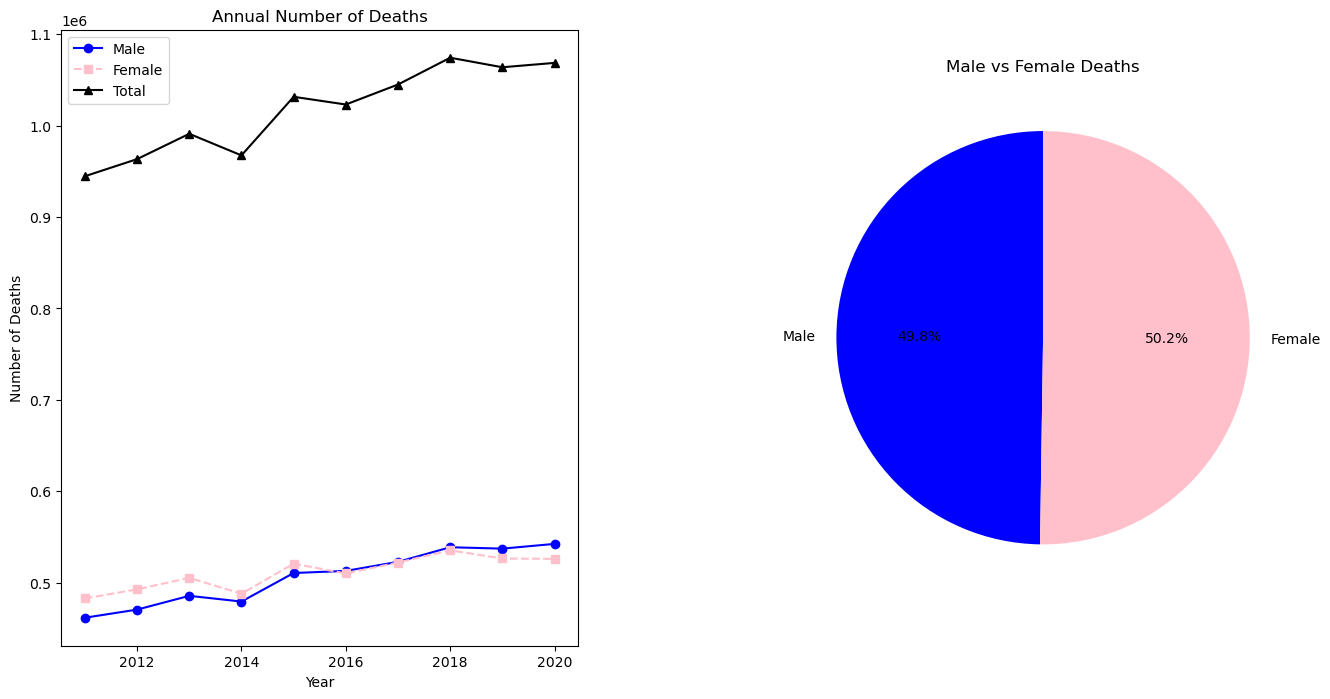

In [25]:
 plot_death_charts(yearly_deaths)

##### The number of mortalities has exhibited a gradual increase over the course of the decade. However, a notable observation is that the number of men dying surpassed the number of women dying in the year 2015, and this trend continued until the end of the decade.

### 3.  The 10 Leading Causes of Death in the General Population and Stratified by Gender
#### Question: What have been the most popular and common causes of death for men and women over the past decade?

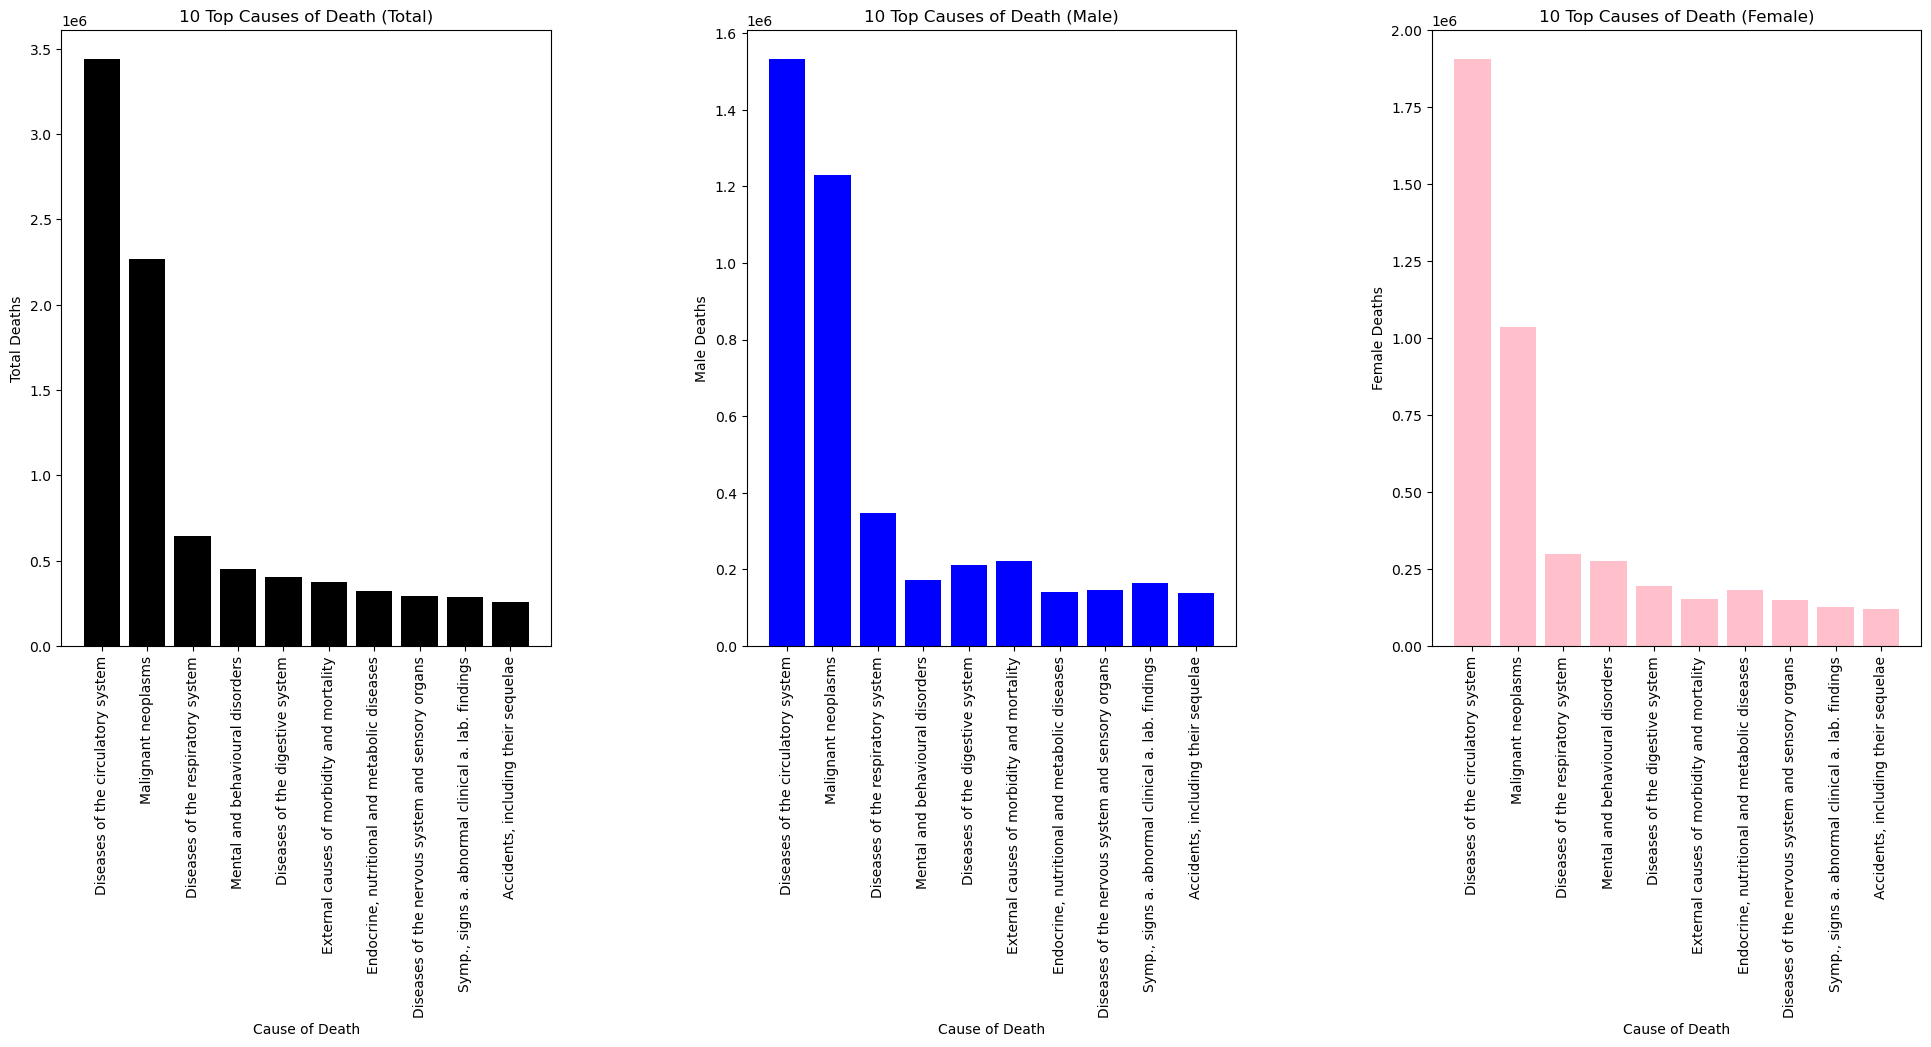

In [7]:
plot_causes(grouped_causes, plot_type='top', num_causes=10)

#### It can be seen that Diseases of the circulatory system, Malignant Neoplasms & the diseases of respiratory systems have been the top causes of death of the german men and women in the pas decade.

### 3.  Lowest 10 causes of death for the general population and population stratified by the gender.
#### Question: What is the most insignificant cause of deaths for the general population?

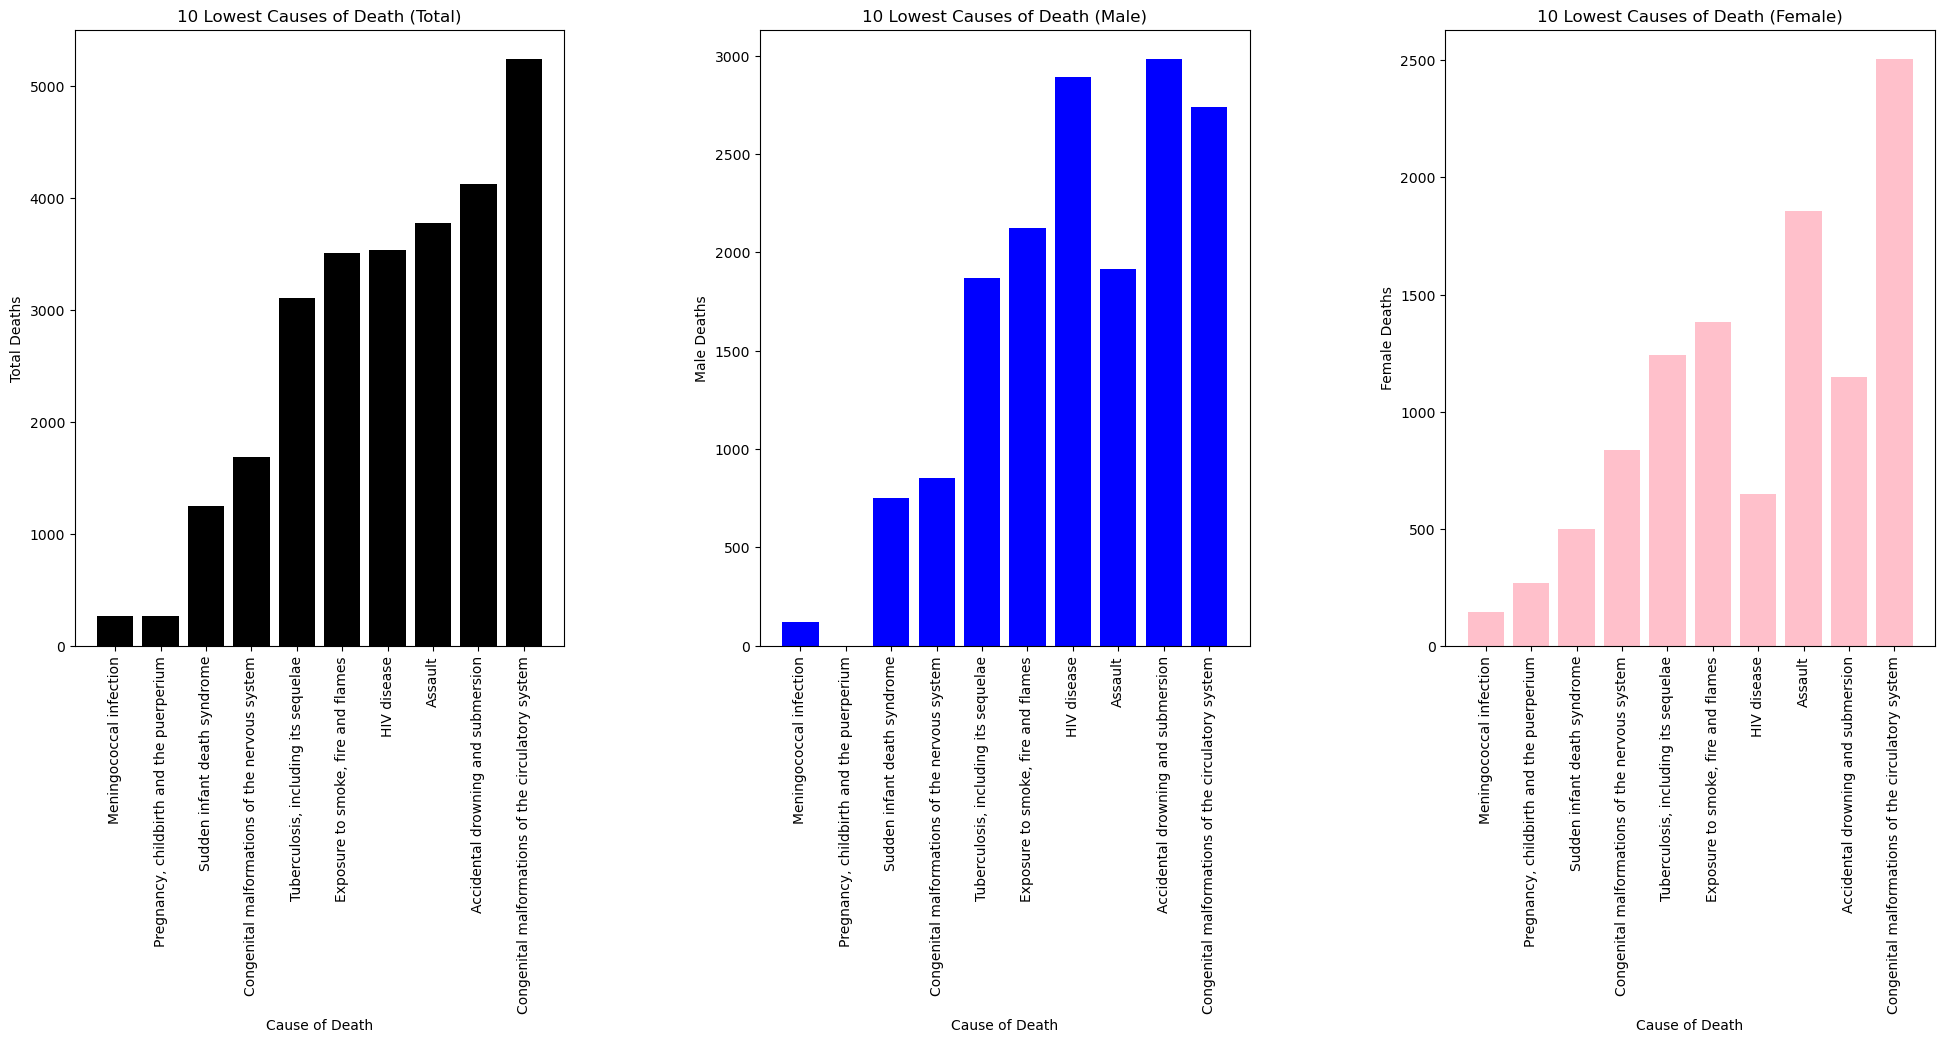

In [27]:
 plot_causes(grouped_causes, plot_type='lowest', num_causes=10)

#### It can been seen that Meningococcal infections claimed the least amount of lives.

#  Comparing the results from the beginning of the decade to the end of the decade.

 #### 10 leading Causes of Male Deaths at the Beginning and End of the Decade
 ##### Question: What changes can be observed when comparing the beginning of a decade to its end?

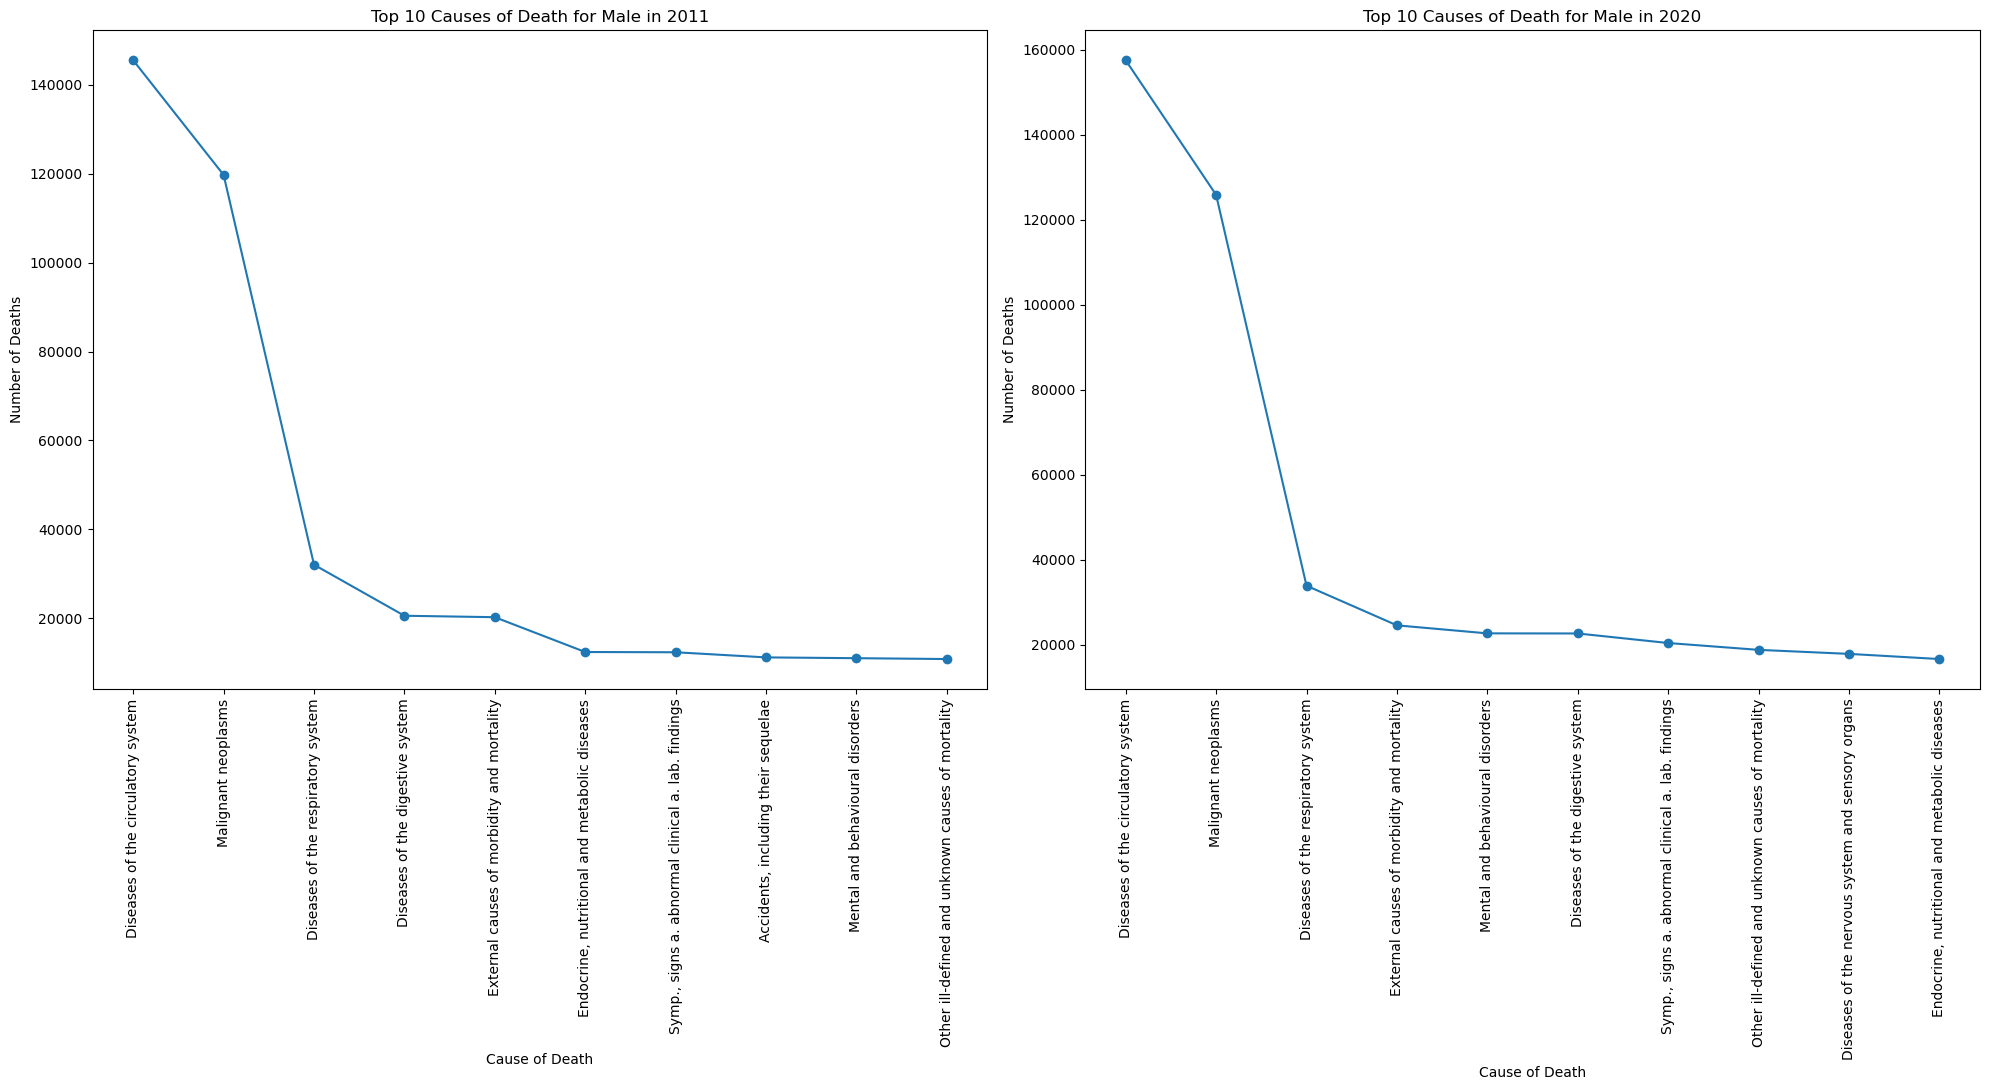

In [28]:
 plot_top_causes_years(df, 2011, 2020, gender='Male', num_causes=10)

##### Although diseases of the circulatory system, malignant neoplasms, and diseases of the respiratory system have consistently remained the primary causes of death throughout the decade, it is noteworthy that deaths resulting from external causes of morbidity have increased by one rank by the end of the decade compared to the beginning. Furthermore, fatalities attributed to endocrine, nutritional, and metabolic disorders have decreased by four ranks by the end of the decade.

 #### 10 leading Causes of Female Deaths at the Beginning and End of the Decade
 ##### Question: What changes can be observed when comparing the beginning of a decade to its end?

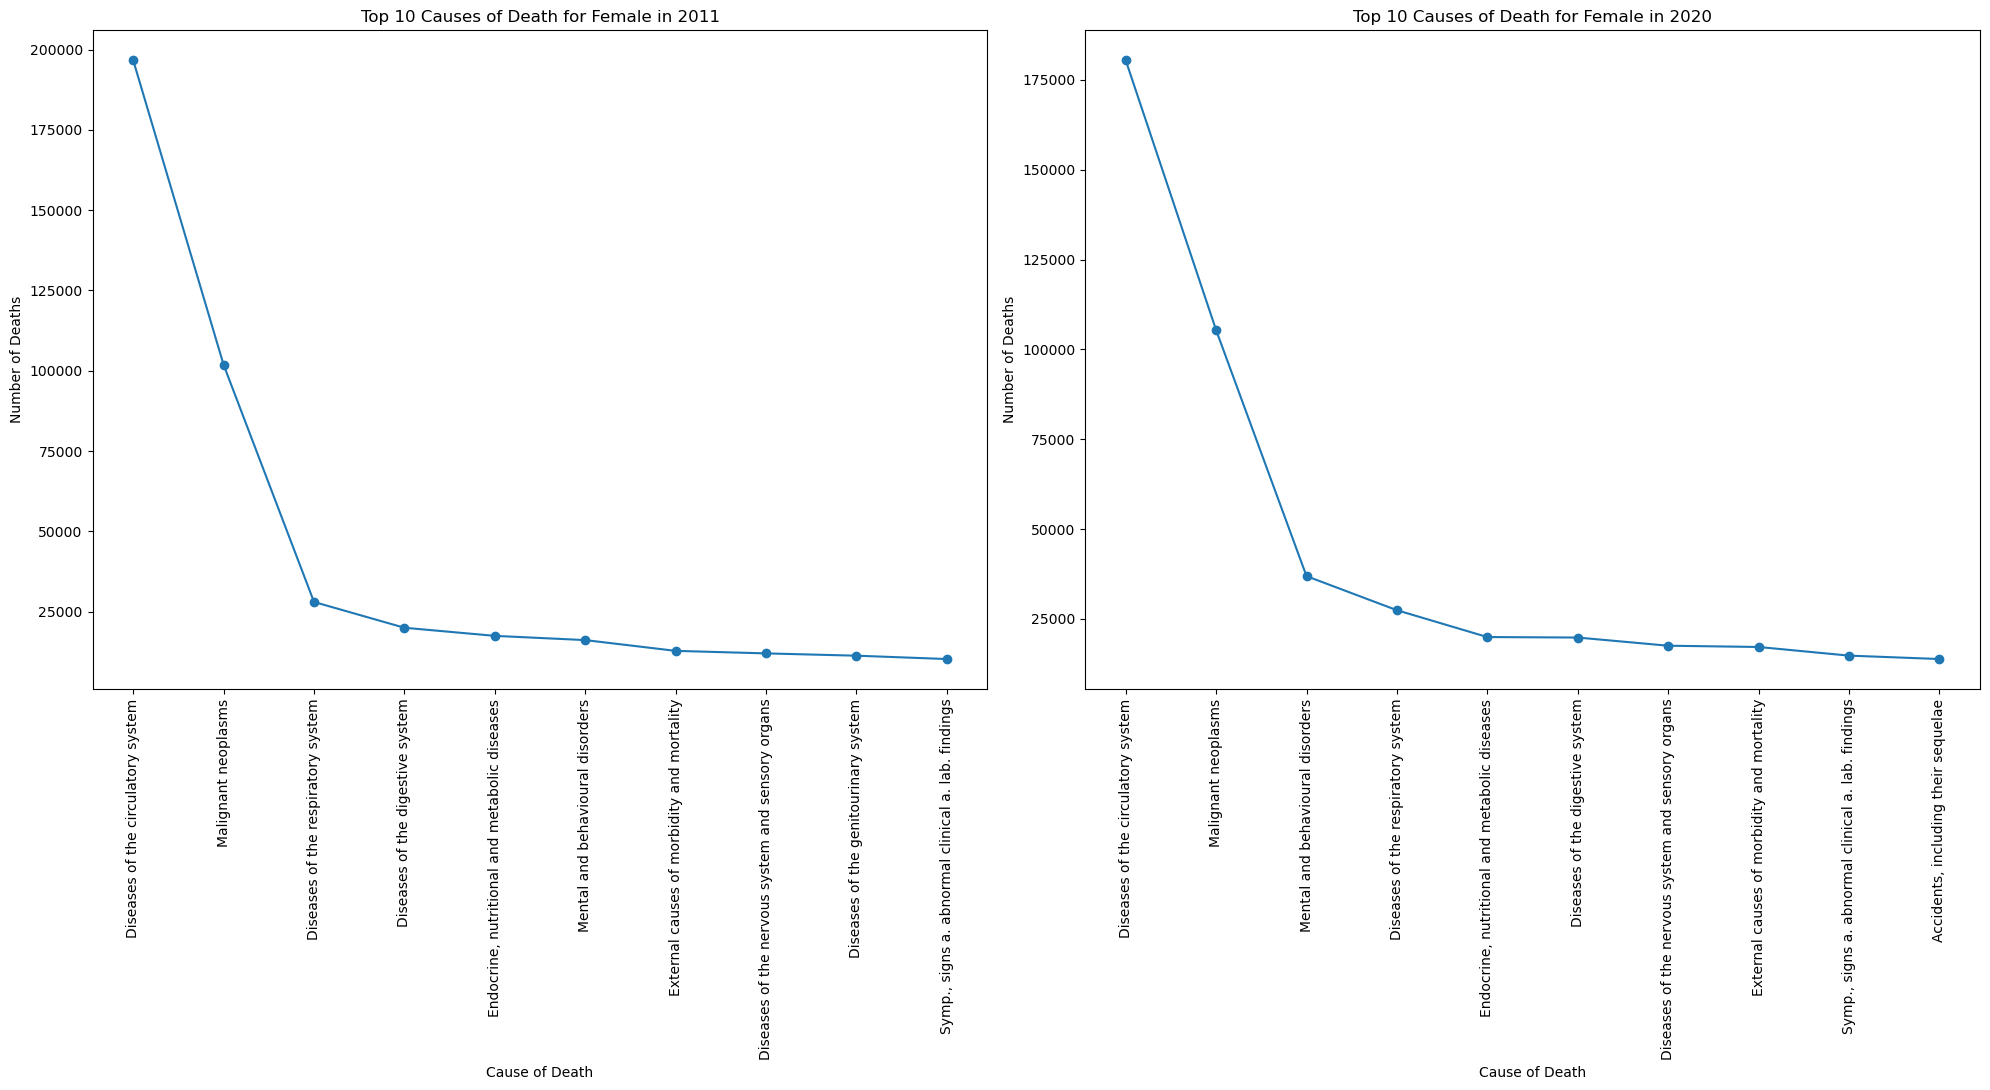

In [29]:
plot_top_causes_years(df, 2011, 2020, gender='Female', num_causes=10)

##### Although diseases of the circulatory system, malignant neoplasms,consistently remained the primary causes of death throughout the decade, it is noteworthy that deaths resulting from Mental and behavioural disorders have increased by three rank by the end of the decade compared to the beginning. Furthermore, fatalities attributed to digestive system have decreased by two ranks by the end of the decade.

#### Comparing the proportion of male and female mortality from the beginning to the end of the decade.
##### Which gender experienced a higher number of mortalities at the beginning of the decade, and has this remained the same by the end?

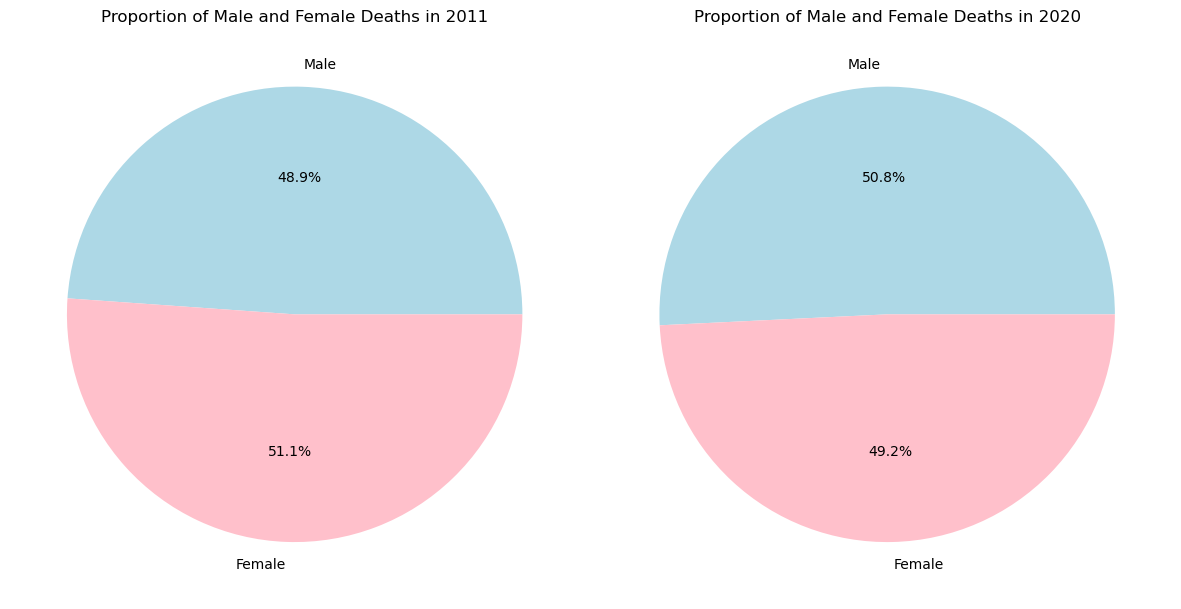

In [30]:
 plot_male_female_deaths_proportion(df)

##### There were more female fatalities at the beginning of the decade, but by the end, the number of male fatalities had increased.

### Proportion of deaths versus those who are alive from the beginning of the decade until the end of the decade.
#### Question: Has the proportion of deaths to the number of individuals alive increased or decreased by the end of the decade?

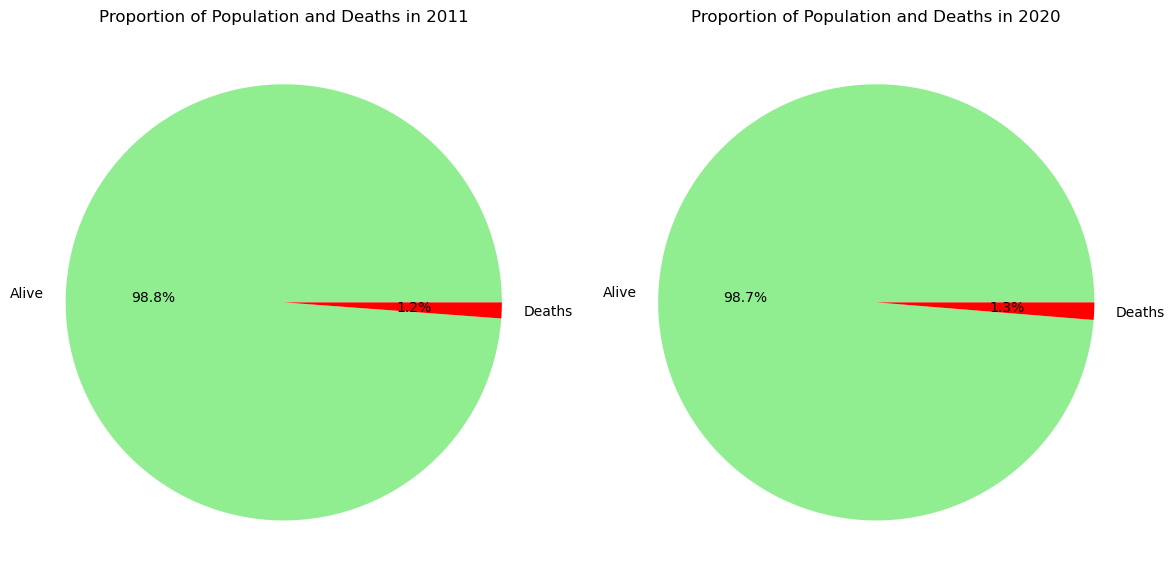

In [31]:
plot_population_vs_deaths(df, POPULATION_2011, DEATHS_2011, POPULATION_2020, DEATHS_2020)

#### The population proportion of deaths has slightly increased by the end of the decade compared to the beginning of the decade.

# Summary

This statistical analysis aimed to investigate the causes of mortality between two genders from 2011 to 2020. The findings revealed interesting patterns in the mortality rates. Initially, in the early part of the decade, the number of females dying was higher compared to males. However, this trend shifted in the year 2016 and remained consistent until the end of the decade.

The analysis identified Diseases of the circulatory system and malign neoplasm as the leading causes of mortality for both genders. Additionally, it was observed that External causes of morbidity affected more men than women. Conversely, Mental and behavioural disorders had a greater impact on females than males.

Towards the end of the decade, there was a noticeable increase in morbidity as a cause of death among men. Meanwhile, mental and behavioral disorders as a cause of death among women were also on the rise. It is worth noting that deaths due to intentional self-harm decreased among women by the end of the decade.

Furthermore, the population data obtained from Genesis.destatis.de indicated that at the beginning of the decade, the mortality percentage of the population was approximately 1.2%. However, this percentage increased to 1.3% by the end of the decade.

Overall, this analysis shed light on the changing trends in mortality between genders over the course of the decade, highlighting the prominent causes of death and the shifting patterns observed in specific categories of diseases and disorders.

## References

1. Genesis.destatis.de. Table 12411: Current updating of population figures. \[Online\] Available: [https://www-genesis.destatis.de/genesis/online?operation=abruftabelleBearbeiten&levelindex=2&levelid=1686255670783&auswahloperation=abruftabelleAuspraegungAuswaehlen&auswahlverzeichnis=ordnungsstruktur&auswahlziel=werteabruf&code=12411-0001&auswahltext=&werteabruf=Value+retrieval#abreadcrumb](https://www-genesis.destatis.de/genesis/online?operation=abruftabelleBearbeiten&levelindex=2&levelid=1686255670783&auswahloperation=abruftabelleAuspraegungAuswaehlen&auswahlverzeichnis=ordnungsstruktur&auswahlziel=werteabruf&code=12411-0001&auswahltext=&werteabruf=Value+retrieval#abreadcrumb)

2. Genesis.destatis.de. Table 23211: Causes of death statistics. \[Online\] Available: [https://www-genesis.destatis.de/genesis/online?operation=statistic&levelindex=0&levelid=1686255924390&code=23211#abreadcrumb](https://www-genesis.destatis.de/genesis/online?operation=statistic&levelindex=0&levelid=1686255924390&code=23211#abreadcrumb)

3. Python Programming Language:

    The Python Software Foundation. Python Language Reference, version 3.11. Available: [https://docs.python.org/3/reference/](https://docs.python.org/3/reference/)

4. pandas:

    Wes McKinney. "pandas: a foundational Python library for data analysis and statistics." Python for High Performance and Scientific Computing, pages 1-9, 2011. Available: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)

5. matplotlib:

    John D. Hunter. "Matplotlib: A 2D Graphics Environment." Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007. Available: [https://matplotlib.org/](https://matplotlib.org/)

6. argparse:

    Python Software Foundation. "argparse – Parser for command-line options, arguments and subcommands." Available: [https://docs.python.org/3/library/argparse.html](https://docs.python.org/3/library/argparse.html)